<a href="https://colab.research.google.com/github/OlegMukminov/desktop-tutorial/blob/main/Lesson4/hometask/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [ ]:
#Colab Version
!wget https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv

--2022-08-07 05:03:40--  https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/hometask/test_cluster.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6431598 (6.1M) [text/plain]
Saving to: ‘test_cluster.csv’

test_cluster.csv    100%[===================>]   6.13M  --.-KB/s    in 0.03s   

2022-08-07 05:03:41 (180 MB/s) - ‘test_cluster.csv’ saved [6431598/6431598]



In [ ]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [ ]:
df['gender']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
49995      F
49996      F
49997      М
49998      М
49999      F
Name: gender, Length: 50000, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

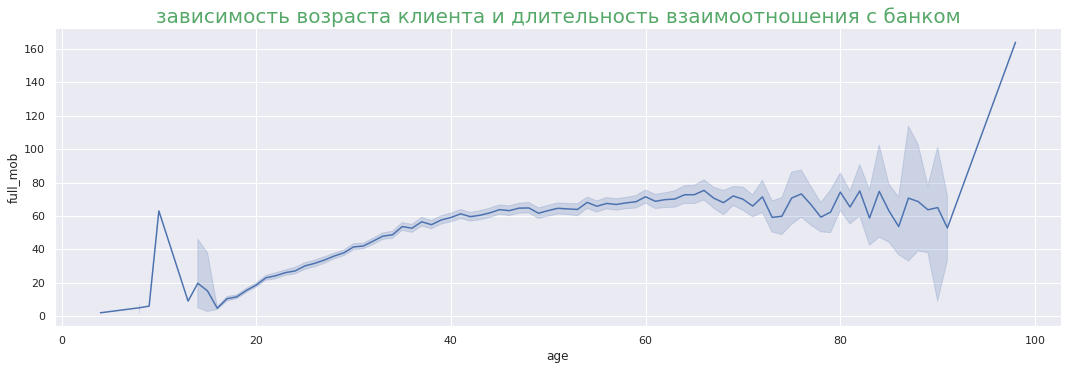

In [ ]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='full_mob', 
    data=df, 
    kind='line',
    aspect=3
)
plt.title('зависимость возраста клиента и длительность взаимоотношения с банком', size=20, color='g');

In [ ]:
#df[['cl_balance_0m', 'income','casa_balance_0m', 'td_balance_0m']].head()

In [ ]:
#df.query("td_balance_0m > 0")['td_balance_0m'].count()

In [ ]:
data1 = df[['city_type', 'dc_trx_sum']].groupby(['city_type']).mean()

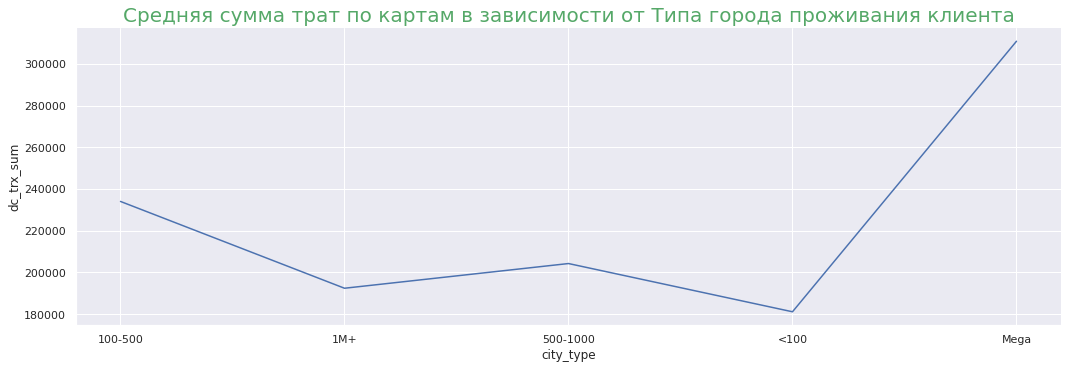

In [ ]:
sns.set(style='darkgrid')  

sns.relplot(
    x = 'city_type', 
    y = 'dc_trx_sum', 
    data = data1, 
    kind='line',
    aspect=3
)
plt.title('Средняя сумма трат по картам в зависимости от Типа города проживания клиента', size=20, color='g');

In [ ]:
data2 = df[['gender', 'Avg_trx']].groupby(['gender']).mean()
data2 = data2.reset_index()

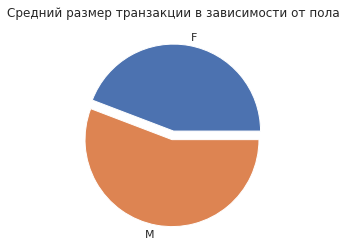

In [ ]:
v = data2['Avg_trx']
labels = data2['gender']
explode = [0, 0.1]
plt.pie(v, labels=labels, explode=explode)
plt.title("Средний размер транзакции в зависимости от пола")
plt.show()

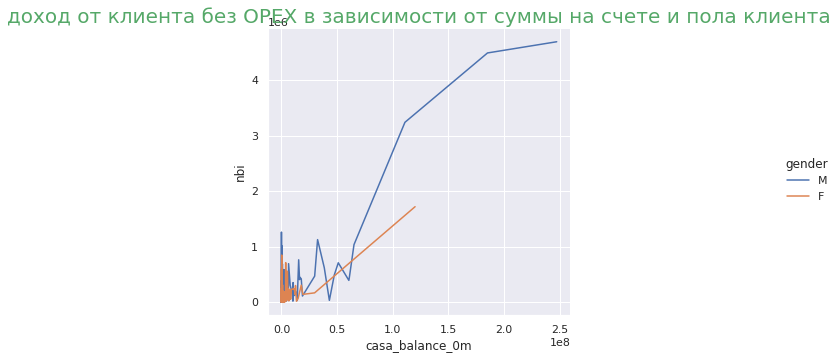

In [ ]:
sns.relplot(
    x='casa_balance_0m', 
    y='nbi', 
    hue='gender', 
    data = df, 
    kind='line',
    err_style="bars",
    ci=9)   # Standard Errors
plt.title('доход от клиента без OPEX в зависимости от суммы на счете и пола клиента', size=20, color='g');


In [ ]:
data3 = df[['gender', 'ml_balance', 'cl_balance_0m']].groupby(['gender']).mean()
data3 = data3.reset_index()
data3

,gender,ml_balance,cl_balance_0m
0,F,10873.767353,50556.211663
1,М,15024.973215,70278.295133


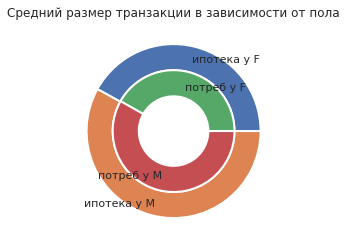

In [ ]:
v1 = data3['ml_balance']
labels1 = 'ипотека у ' + data3['gender']
v2 = data3['cl_balance_0m']
labels2 = 'потреб у ' + data3['gender']
width = 0.3
wedge_properties = {"width":width, "edgecolor":"w",'linewidth': 2}
plt.pie(v1, labels=labels1, labeldistance=0.85,
        wedgeprops=wedge_properties)
plt.pie(v2, labels=labels2, labeldistance=0.75,
        radius=1-width, wedgeprops=wedge_properties)
plt.title("Сумма ипотеки и потреб. кредита по полу клиента")
plt.show()